## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 27.04.2023

Мягкий дедлайн: 23:59MSK 11.05.2023

Жесткий дедлайн: 23:59MSK 18.05.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук hw-practice-05-trees-Username.ipynb
* Модуль hw5code.py

Username — ваша фамилия и имя на латинице именно в таком порядке

В гугл форму https://forms.gle/6S2gPkGup7LnDzjU7 нужно отправить файл hw5code.py с реализованными функциями и классами  и ваш ноутбук.

* **ВАЖНО:** 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 5 - 7 => 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.1, factor=0.5, random_state=42),
    make_moons(noise=0.1, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

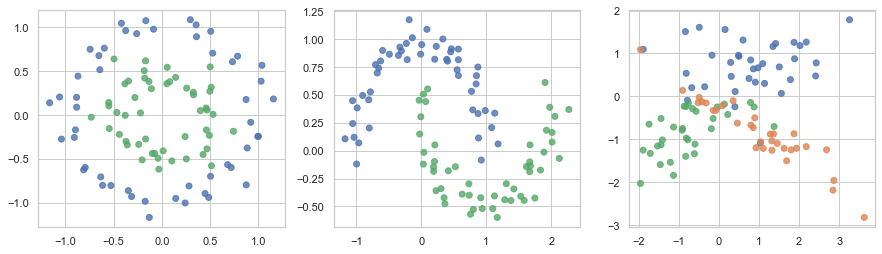

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.show()

In [6]:
Xy_data = [dataset for dataset in datasets]

Xy_num = 2 #Xy_num defines exact dataset number in datasets
(X, y) = (Xy_data[Xy_num][0], Xy_data[Xy_num][1])

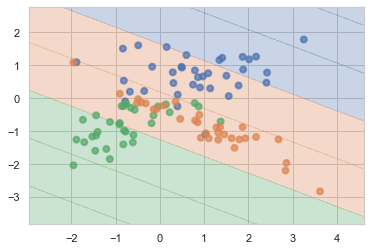

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression

lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [8]:
Xy_data_split = [train_test_split(Xy_data[i][0], Xy_data[i][1], test_size=0.3, random_state=42) 
                 for i in range(len(Xy_data))]
# Xy_data_split stores data in order [X_train, X_test, y_train, y_test]

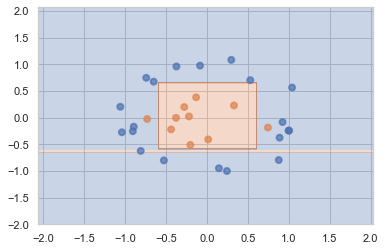

Decision tree accuracy on train set:           1.000
Decision tree accuracy on test set:            0.900


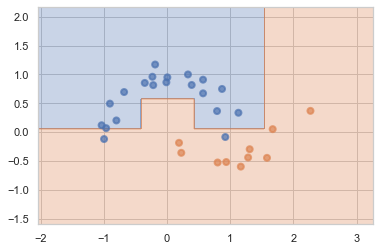

Decision tree accuracy on train set:           1.000
Decision tree accuracy on test set:            0.933


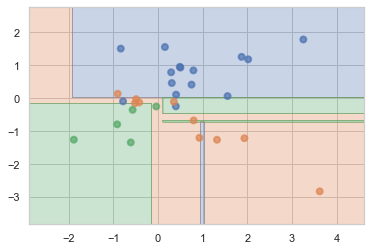

Decision tree accuracy on train set:           1.000
Decision tree accuracy on test set:            0.800


In [9]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  (I'll leave this magic man here since I just love it, thank you for those pics)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

dt = DecisionTreeRegressor(random_state=42)

for split_set in Xy_data_split:
    dt = dt.fit(split_set[0], split_set[2])
    plot_surface(dt, split_set[1], split_set[3])
    print(f"Decision tree accuracy on train set: \
          {accuracy_score(split_set[2], dt.predict(split_set[0])):.3f}")
    print(f"Decision tree accuracy on test set:  \
          {accuracy_score(split_set[3], dt.predict(split_set[1])):.3f}")

**Ответ:** *Деревья переобучились (точность на обучающем сете неизменно 1.0), но падение точности на тестовой сложно назвать резким для данных такого малого объема.*

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

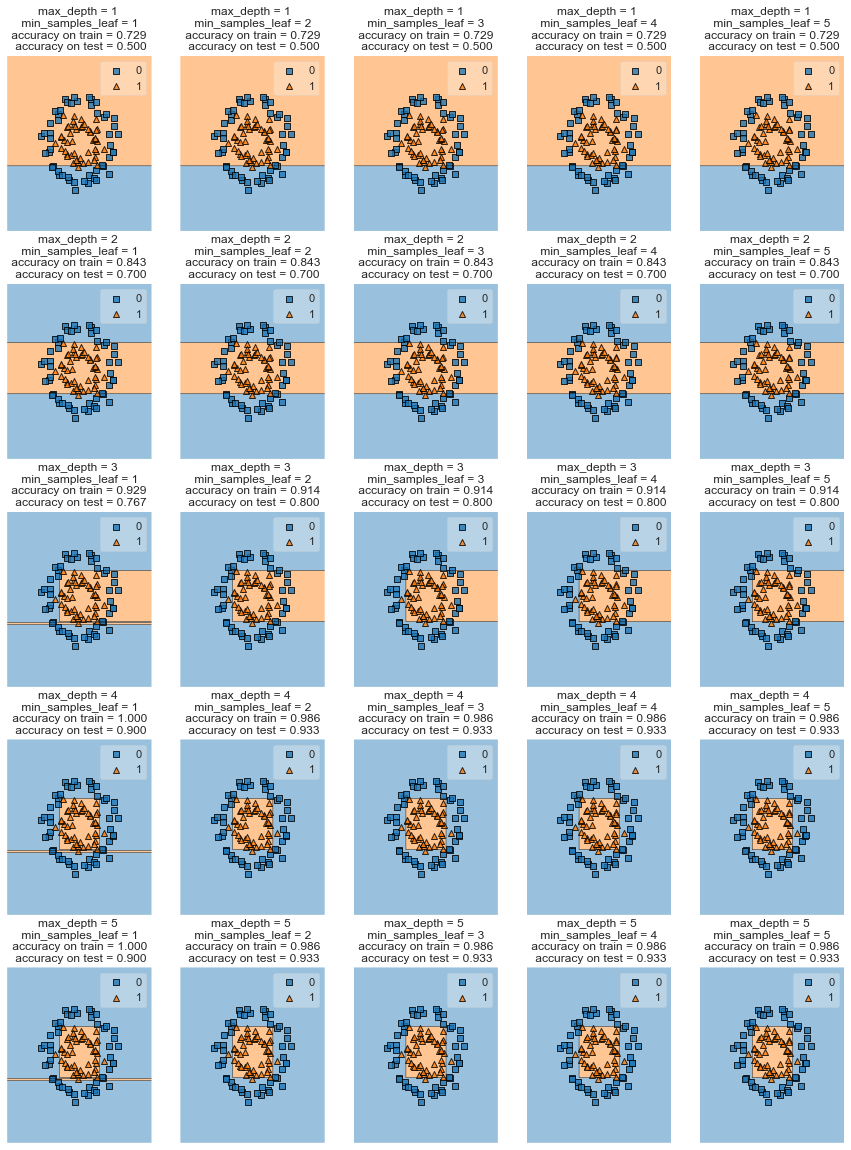

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・
from mlxtend.plotting import plot_decision_regions

Xy_num = 0
set = Xy_data[Xy_num]
split_set = Xy_data_split[Xy_num]

depth_vars = np.arange(1,6)
leaf_vars = np.arange(1,6)

fig, ax = plt.subplots(nrows=depth_vars.size, ncols=leaf_vars.size, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3)

for i in range(depth_vars.size):
    max_depth = depth_vars[i]
    for j in range(leaf_vars.size):
        min_samples_leaf = leaf_vars[j]
        dt_sandbox = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt_sandbox.fit(split_set[0], split_set[2])

        train_acc = accuracy_score(split_set[2], dt_sandbox.predict(split_set[0]))
        test_acc = accuracy_score(split_set[3], dt_sandbox.predict(split_set[1]))

        ax[i][j].set_title("max_depth = {} \n min_samples_leaf = {} \n accuracy on train = {:0.3f} \n accuracy on test = {:0.3f}"
                           .format(max_depth, min_samples_leaf, train_acc, test_acc))
        ax[i][j].axis("off")
        plot_decision_regions(set[0], set[1], dt_sandbox, ax=ax[i][j])
        
plt.show()

__Ответ:__

- Для датасета 0:
    - `max_depth`: точности на тренировочных и тестовых данных монотонно растут - таким образом, максимум обобщающей способности достигается с 5 уровнем глубины.
    При этом с `min_sample_leaf`=1 для значений `max_depth`>3 проиcходит переобучение (точность на тренировочных данных = 1.0).
    - `min_sample_leaf`: обобщающая способность выходит на плато одинаковых максимальных значений с 2 до 5 листьев в вершине, в то время как максимальная точность на тренировочных данных достигается для `min_sample_leaf`=1 и затем, снижаясь, не меняется с 2 до 5. 
    При этом с `min_sample_leaf`=1 для значений `max_depth`>3 проиcходит переобучение (точность на тренировочных данных = 1.0).

- Для датасета 1:
    - `max_depth`: обобщающая способность выходит на плато одинаковых максимальных значений точности с 2 до 5 уровней глубины. Возможно, это следствие обучающей выборки, не включающей точки в вершинах верхней дуги, самые крайние для датасета: ни одна построенная разделяющая гиперплоскость не включает их в правильную зону. 
    Точность на тренировочной части датасета монотонно растет и к 5 уровням глубины достигает 1.0 - т.е., происходит переобучение.
    - `min_sample_leaf`: точность на тренировочных и тестовых данных не меняется в зависимости от этого параметра.

- Для датасета 2:
    - `max_depth`: обобщающая способность монотонно улучшается до 3 уровней глубины, затем начинает монотонно спадать - таким образом, максимум достигается в 3.
    Т.е., при 
        - `max_depth`<3  модель оказывается слишком проста для данных, 
        - `min_sample_leaf`<3 проиcходит переобучение.
    - `min_sample_leaf`: обобщающая способность неизменно лучшая с 2 листьями в вершине (при этом точность на тестовых данных может совпадать для разных значений этого параметра) и монотонно падает с повышением этого числа. 
    Т.е., при 
        - `min_sample_leaf`<2 проиcходит переобучение, 
        - `min_sample_leaf`>2 модель оказывается слишком проста для данных.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [11]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    n = len(feature_vector)
    ginis = []
    features_targets = sorted(list(zip(feature_vector, target_vector)))
    thresholds, target_vector_t = zip(*features_targets)
    thresholds, target_vector_t = np.array(thresholds), np.array(target_vector_t)

    t_shift1 = np.roll(thresholds, 1)
    t_shift_1 = np.roll(thresholds, -1)
    t_sum = (t_shift1 + t_shift_1) / 2
    thresholds[1 : n - 1] = t_sum[1 : n - 1]

    for iobj in range(n):
            ln1 = target_vector_t[: iobj+1].sum()
            ln0 = iobj + 1 - ln1
            rn1 = target_vector_t[iobj+1 :].sum()
            rn0 = n - iobj - 1 - rn1

            if ((not ln1) or (not ln0) or (not rn1) or (not rn0)):
                if (not len(ginis)):
                    ginis.append(0)
                else:
                    ginis.append(ginis[-1])
                continue

            Hl = 1 - (ln0/n)**2 - (ln1/n)**2
            Hr = 1 - (rn0/n)**2 - (rn1/n)**2

            ginis.append(- (ln0 + ln1) / n * Hl - (rn0 + rn1) / n * Hr)

    gini_best = np.min(ginis)
    threshold_best = thresholds[np.argmin(ginis)]
    return (thresholds, ginis, threshold_best, gini_best)

Под критерием Джини здесь подразумевается следующая функция:
$$
    Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r),
$$ 
где 
- $R$ — множество объектов, 
- $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево, 
- $H(R) = 1-p_1^2-p_0^2$, 
- $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:

* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

Параметры:
    
- `param feature_vector` - вещественнозначный вектор значений признака
- `param target_vector` - вектор классов объектов,  `len(feature_vector) == len(target_vector)`

Результат работы:
- `return thresholds` - отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на две различные подвыборки, или поддерева
- `return ginis` - вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
- `return threshold_best` - оптимальный порог (число)
- `return gini_best` - оптимальное значение критерия Джини (число)

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [12]:
import pandas as pd

data_students = pd.read_csv('students.csv')
X_train = data_students.drop(columns=['UNS'])
y_train = data_students['UNS']

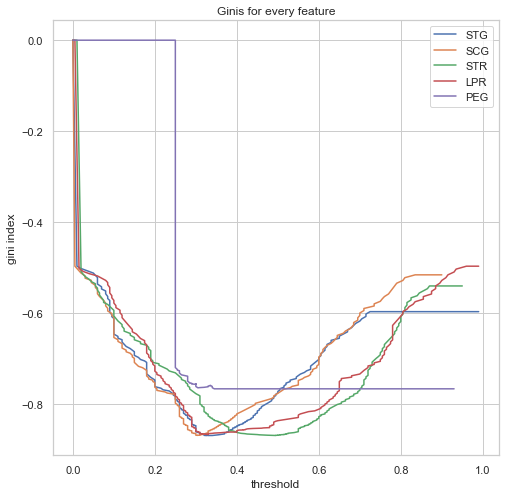

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8, 8))

for column in X_train:
    thresholds, ginis, threshold_best, gini_best = find_best_split(X_train[column], y_train)
    plt.plot(thresholds, ginis, label=column) 

plt.title("Ginis for every feature")
plt.xlabel("threshold")
plt.ylabel("gini index")
plt.legend()
plt.show()


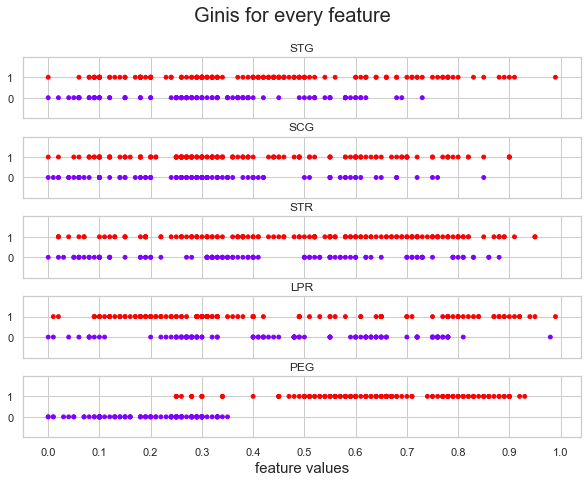

In [14]:
fig, ax = plt.subplots(nrows=len(X_train.columns), sharex=True, figsize=(10, 7))
plt.subplots_adjust(hspace=0.3)

plt.suptitle("Ginis for every feature", fontsize=20)
plt.xlabel("feature values", fontsize=15)

for i in range(len(X_train.columns)):
    column = X_train.columns[i]
    thresholds, ginis, threshold_best, gini_best = find_best_split(X_train[column], y_train)

    ax[i].set_ylim([-1, 2])
    ax[i].set_yticks([0, 1])
    ax[i].set_xticks(np.arange(0, 1.1, 0.1))

    ax[i].set_title(column)
    ax[i].scatter(X_train[column], y_train, s=15, c=y_train, cmap="rainbow") 

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

*По графикам критерия Джини, деление на выборки на два поддерева прежде всего следует проводить по признаку 'PEG': у него наибольший участок постоянных значений, следовательно, среди порогов высока доля ситуаций с разделением ноды на две, среди которых хотя бы одна содержит только 1 класс, но при этом они не все такие (т.е., признак имеет какое-то влияние на итоговый класс), т.к. график не полностью константа. Это соответствует визуальным наблюдениям по scatter-графикам.*

*В это время кривые двух других признаков очень близки друг к другу по динамике: они возрастают и убывают со сравнительно небольшими участками постоянства (если таковые вообще есть).*

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [40]:
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        # if np.all(sub_y != sub_y[0]):
        if np.all(sub_y == sub_y.iloc[0]):   # check if all classes in the node are same
            node["type"] = "terminal"
            node["class"] = sub_y.iloc[0]
            return
        
        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(0, sub_X.shape[1]):         # iterate over all objects in X
            feature_type = self._feature_types[feature]
            feature_name = sub_X.columns[feature]
            categories_map = {}

            if feature_type == "real":                   # get all numerical columns
                feature_vector = sub_X[:][feature_name]
            elif feature_type == "categorical":
                # counts = Counter(sub_X[:, feature])        
                # clicks = Counter(sub_X[sub_y == 1, feature])
                counts = Counter(sub_X[:][feature_name])     # dictionary of all categorical features values and their amounts
                clicks = Counter(sub_X[sub_y == 1][feature_name])   # same but only positive class
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                # categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                categories_map = dict(zip(list(range(len(sorted_categories))), sorted_categories))
                # feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:][feature_name]))
                print(feature_name)
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X.iloc[:][feature_name])))
            else:
                raise ValueError

            # if len(feature_vector) == 3:
            if len(feature_vector) <= self._min_samples_leaf:
                continue
            
            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            # if gini_best is None or gini > gini_best:
            if gini_best is None or gini < gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                # elif feature_type == "Categorical":
                elif feature_type == "categorical":
                    # threshold_best = list(map(lambda x: x[0], filter(lambda x: x[1] < threshold, categories_map.items())))
                    threshold_best = list(map(lambda x: x[1], list(filter(lambda x: x[1] < threshold, categories_map.items()))))
                else:
                    raise ValueError
        print("")
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        # self._fit_node(sub_X[np.logical_not(split)], sub_y[split], node["right_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        pass

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


max_depth = 10
min_samples_leaf = 1

dt_vanilla = DecisionTree(feature_types=np.full(len(X.columns), "categorical"), max_depth=max_depth, min_samples_leaf=min_samples_leaf)
dt_vanilla.fit(X_train, y_train)
print(dt_vanilla._tree)
# train_acc = accuracy_score(y_train, dt_vanilla.predict(X_train))


x
s
n
t
p.1
f
c
n.1
k
e
e.1
s.1
s.2
w
w.1
p.2
w.2
o
p.3
k.1
s.3
u

x
s
n
t
p.1
f
c
n.1
k


KeyError: 11

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [16]:
from sklearn.preprocessing import LabelEncoder
data_mushs = pd.read_csv("agaricus-lepiota.data")

X = data_mushs.apply(LabelEncoder().fit_transform)
print("class {} is signed as {}".format(data_mushs.iloc[0]['p'], X.iloc[0]['p']))
print("class {} is signed as {}".format('p' if data_mushs.iloc[0]['p']=='e' else 'e', 1 - X.iloc[0]['p']))

class e is signed as 0
class p is signed as 1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['p']), X['p'], test_size=0.5, random_state=42)

max_depth = 6
min_samples_leaf = 1

dt_lib = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
dt_lib.fit(X_train, y_train)

train_acc = accuracy_score(y_train, dt_lib.predict(X_train))
test_acc = accuracy_score(y_test, dt_lib.predict(X_test))

print("accuracy on train = {:0.10f} \naccuracy on test =  {:0.10f}".format(train_acc, test_acc))


dt_vanilla = DecisionTree(feature_types=np.full(len(X.columns), "categorical"), max_depth=max_depth, min_samples_leaf=min_samples_leaf)
dt_vanilla.fit(X_train, y_train)

train_acc = accuracy_score(y_train, dt_vanilla.predict(X_train))
test_acc = accuracy_score(y_test, dt_vanilla.predict(X_test))

print("accuracy on train = {:0.10f} \naccuracy on test =  {:0.10f}".format(train_acc, test_acc))


accuracy on train = 0.9985225314 
accuracy on test =  0.9995076317


IndexError: single positional indexer is out-of-bounds

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: